# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP2. Como o desempenho do algoritmo proposto se compara ao de algoritmos da literatura quando aplicados ao DSPSP?

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare, normaltest

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume, median_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-all-i01.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

In [19]:
def rq2(data, instance_id, algorithm_id):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", "execution"], as_index=False)["hypervolume"].mean()
    return df

In [20]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

In [21]:
comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}


In [22]:
for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]
        

In [23]:
cmp = mean_hypervolume(data).reset_index()
cmp

,instance,algorithm,mean,std
0,ST10_DT10_E5_SK4-5,MS2MO,0.164868,0.386366
1,ST10_DT10_E5_SK4-5,MS2MODynamic,0.120670,0.298732
2,ST10_DT10_E5_SK4-5,NSGAII,0.175602,0.384316
3,ST10_DT10_E5_SK4-5,NSGAIIDynamic,0.158632,0.381376
4,ST10_DT10_E5_SK4-5,SMPSO,0.890150,0.535254
5,ST10_DT10_E5_SK4-5,SMPSODynamic,0.959424,0.563300


#### Gráficos comparativos

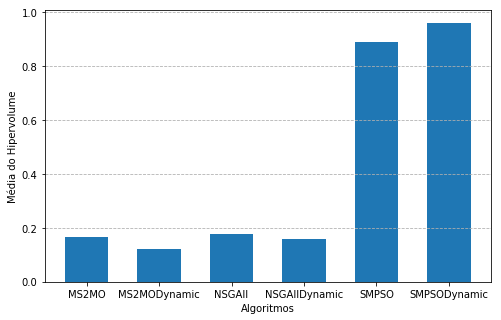

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(cmp["algorithm"], cmp["mean"], align='center', width=0.6)
# ax.set_xticks(index)
ax.set_xticklabels(cmp["algorithm"])
plt.grid(axis="y", linestyle="dashed")
plt.xlabel("Algoritmos")
plt.ylabel("Média do Hipervolume")
plt.show()


In [44]:
# compare samples

ms2mo = rq2(data, "ST10_DT10_E5_SK4-5", "MS2MO").hypervolume
ms2modyn = rq2(data, "ST10_DT10_E5_SK4-5", "MS2MODynamic").hypervolume
nsgaii = rq2(data, "ST10_DT10_E5_SK4-5", "NSGAII").hypervolume
nsgaiidyn = rq2(data, "ST10_DT10_E5_SK4-5", "NSGAIIDynamic").hypervolume
smpso = rq2(data, "ST10_DT10_E5_SK4-5", "SMPSO").hypervolume
smpsodyn = rq2(data, "ST10_DT10_E5_SK4-5", "SMPSODynamic").hypervolume

# stat, p = friedmanchisquare(ms2mo, ms2modyn, nsgaii, nsgaiidyn, smpso, smpsodyn)
stat, p = friedmanchisquare(ms2modyn, nsgaiidyn, smpsodyn)
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    


Statistics=48.267, p=0.000000
Different distributions (reject H0)


In [49]:
stat, p = normaltest(smpsodyn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=50.827, p=0.000
Different distributions (reject H0)


In [50]:
stat, p = wilcoxon(smpso, smpsodyn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.000, p=0.000
Different distributions (reject H0)


In [30]:
rq2(data, "ST10_DT10_E5_SK4-5", "MS2MO")

,instance,algorithm,execution,hypervolume
0,ST10_DT10_E5_SK4-5,MS2MO,1,0.203906
1,ST10_DT10_E5_SK4-5,MS2MO,2,0.140390
2,ST10_DT10_E5_SK4-5,MS2MO,3,0.160775
3,ST10_DT10_E5_SK4-5,MS2MO,4,0.146825
4,ST10_DT10_E5_SK4-5,MS2MO,5,0.204947
5,ST10_DT10_E5_SK4-5,MS2MO,6,0.154855
6,ST10_DT10_E5_SK4-5,MS2MO,7,0.172837
7,ST10_DT10_E5_SK4-5,MS2MO,8,0.181039
8,ST10_DT10_E5_SK4-5,MS2MO,9,0.095894
9,ST10_DT10_E5_SK4-5,MS2MO,10,0.160235


In [12]:
ms2mo = instance_datasets["ST10_DT10_E5_SK4-5"]["MS2MO"]
ms2mo = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

ms2modyn = instance_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic"]
ms2modyn = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

nsgaii = instance_datasets["ST10_DT10_E5_SK4-5"]["NSGAII"]
nsgaii = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

nsgaiidyn = instance_datasets["ST10_DT10_E5_SK4-5"]["NSGAIIDynamic"]
nsgaiidyn = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

smpso = instance_datasets["ST10_DT10_E5_SK4-5"]["SMPSO"]
smpso = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

smpsodyn = instance_datasets["ST10_DT10_E5_SK4-5"]["SMPSODynamic"]
smpsodyn = ms2mo.groupby(["algorithm", "execution"], as_index=False)["hypervolume"].mean()

stat, p = friedmanchisquare(ms2mo, ms2modyn, nsgaii, nsgaiidyn, smpso, smpsodyn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

ValueError: could not convert string to float: 'MS2MO'

In [ ]:
ds = data.groupby(["instance", "algorithm", "execution"], as_index=False)["hypervolume"].agg(['mean', 'std']).reset_index()
ds